# Case 3. Patient Drug Review
**Neural Networks for Machine Learning Applications**<br>
12.03.2023<br>
Erik Holopainen, Alejandro Rosales Rodriguez and Brian van den Berg<br>
[Information Technology, Bachelor's Degree](https://www.metropolia.fi/en/academics/bachelors-degrees/information-technology)<br>
[Metropolia University of Applied Sciences](https://www.metropolia.fi/en)

## 1. Introduction

This notebook serves as an assignment to test our natural text processing skills in regards of Neural Networks. We will have to preprocess and diagnose written texts whether they're negative, neutral and positive. During this assignment we're actually going to work with a dataset containing drug reviews that was used for a hackaton. Hackaton is a competition and we will be using the predefined testing set that the competition provided to the competitors aswell.

## 2. Setup

The data science/machine learning libraries that we imported are:
- tensorflow: Open source library for numerical computation that makes machine learning and developing neural networks faster and easier.
- pandas: Fast, powerful, flexible and easy to use open source data analysis and manipulation tool, built on top of the Python programming language.
- numpy: Python library used for working with arrays. It also has functions for working in domain of linear algebra, fourier transform, and matrices.
- nltk: Leading platform for building Python programs to work with human language data.
- sklearn: Simple and efficient tools for predictive data analysis.
- matplotlib.pyplot: Comprehensive library for creating static, animated, and interactive visualizations in Python.

The regular Python libraries we imported are:
- html: Utilities to manipulate HTML.
- re: Regular expression matching operations similar to those found in Perl.
- sys: variables used or maintained by the interpreter and to functions that interact strongly with the interpreter

In [27]:
# Machine Learning and Data Science
import pandas as pd
import numpy as np
import nltk

# Modeling neural networks
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, Conv1D, MaxPooling1D, Dropout
from keras.preprocessing.text import Tokenizer
from keras.utils import to_categorical
from keras.utils import pad_sequences

# Sklearn
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.utils.class_weight import compute_class_weight

# Data Visualization
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# General imports
import html
import re
import sys

# Print the library versions
print('\033[1m' + 'Notebook Version Register:' + '\033[0m')
print(f'[Python {sys.version}]')
print(f'[{tf.__name__} {tf.__version__}]')
print(f'[{pd.__name__} {pd.__version__}]')
print(f'[{np.__name__} {np.__version__}]')
print(f'[{sklearn.__name__} {sklearn.__version__}]')
print(f'[{nltk.__name__} {nltk.__version__}]')
print(f'[{matplotlib.__name__} {matplotlib.__version__}]')

Notebook Version Register:
[Python 3.10.9 (tags/v3.10.9:1dd9be6, Dec  6 2022, 20:01:21) [MSC v.1934 64 bit (AMD64)]]
[tensorflow 2.11.0]
[pandas 1.5.3]
[numpy 1.24.1]
[sklearn 1.2.0]
[nltk 3.8.1]
[matplotlib 3.6.3]


### Download

By using the function 'nltk.download('popular')' we are checking if the python environment already has access to the nltk datasets. If the datasets are already there, it marks the requirement as satisfied. If the datasets are outdated or if they're not even there, then nltk downloads the resources for you.

In [28]:
# Fetch the nltk datasets
nltk.download('popular')

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to
[nltk_data]    |     C:\Users\brian\AppData\Roaming\nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to
[nltk_data]    |     C:\Users\brian\AppData\Roaming\nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to
[nltk_data]    |     C:\Users\brian\AppData\Roaming\nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to
[nltk_data]    |     C:\Users\brian\AppData\Roaming\nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to
[nltk_data]    |     C:\Users\brian\AppData\Roaming\nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]   

True

## 3. Dataset

In [29]:
# Load in the dataframe
df = pd.read_csv('input\\drugsComTrain_raw.csv')

# Display the dataframe
display(df)

# Display the dataframe description
print("Description of the dataframe:")
display(df.describe().T)

,uniqueID,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,3-Nov-15,10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37
...,...,...,...,...,...,...,...
161292,191035,Campral,Alcohol Dependence,"""I wrote my first report in Mid-October of 201...",10,31-May-15,125
161293,127085,Metoclopramide,Nausea/Vomiting,"""I was given this in IV before surgey. I immed...",1,1-Nov-11,34
161294,187382,Orencia,Rheumatoid Arthritis,"""Limited improvement after 4 months, developed...",2,15-Mar-14,35
161295,47128,Thyroid desiccated,Underactive Thyroid,"""I&#039;ve been on thyroid medication 49 years...",10,19-Sep-15,79


Description of the dataframe:


,count,mean,std,min,25%,50%,75%,max
uniqueID,161297.0,115923.585305,67004.445170,2.0,58063.0,115744.0,173776.0,232291.0
rating,161297.0,6.994377,3.272329,1.0,5.0,8.0,10.0,10.0
usefulCount,161297.0,28.004755,36.403742,0.0,6.0,16.0,36.0,1291.0


### Prepare

Preparing the training data by calling the prepare_data() function on the DataFrame df. The prepared DataFrame is then displayed using the display() function.

+ remove_hashtags(): takes a string as input, and removes any hashtags from it using regular expressions. The function returns the modified string.
+ prepare_data(): takes a DataFrame as input, and performs several preprocessing steps on it and prepares the data for  training. The steps include: removing duplicates, decoding HTML-encoded words, dropping rows with NaN or very short reviews, removing hashtags using the remove_hashtags() function. The function returns the preprocessed DataFrame.

In [30]:
# Function to remove hashtags from reviews
def remove_hashtags(text):
    return re.sub(r'#\w+', '', text)

# Function to prepare data for our model
def prepare_data(df):
    df.drop_duplicates(subset='review', inplace=True)

    # Decode HTML-encoded words
    df['review'] = df['review'].apply(html.unescape)

    # Drop all rows with NaN review and 1 character reviews
    df.dropna(subset=['review'], inplace=True)
    df = df[df['review'].str.strip().astype(bool)]
    df = df[df['review'].str.len() > 1]

    # Remove hashtags from reviews
    df['review'] = df['review'].apply(remove_hashtags)

    return df

# Prepare the training data
df = prepare_data(df)

# Display the current state of our dataframe
display(df)

,uniqueID,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,3-Nov-15,10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37
...,...,...,...,...,...,...,...
161289,105263,Carbamazepine,Trigeminal Neuralgia,"""Up to 800mg seems to work about once every 2n...",1,31-Jan-16,10
161290,103458,Tekturna,High Blood Pressure,"""I have only been on Tekturna for 9 days. The ...",7,7-Feb-10,18
161292,191035,Campral,Alcohol Dependence,"""I wrote my first report in Mid-October of 201...",10,31-May-15,125
161295,47128,Thyroid desiccated,Underactive Thyroid,"""I've been on thyroid medication 49 years, I s...",10,19-Sep-15,79


## 4. Preprocessing

Instructions: Describe:

- how the missing values are handled
- conversion of textual and categorical data into numerical values (if needed)
- how the data is splitted into train, validation and test sets
- the features (=input) and labels (=output), and 
- how the features are normalized or scaled

### Splitting Reviews and Labels

In [31]:
# Get the reviews
X_train = list(df['review'])
y_train = list(df['rating'])

# Split into Train and Validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=.2, random_state=0)

### Filtering and Lemmatizing the Reviews

In [32]:
# Define the nltk variables
en_stopwords = nltk.corpus.stopwords.words('english')
lemmatizer = nltk.stem.WordNetLemmatizer()

# Function to preprocess text
def lemmatize_sentence(sentence):
    sentence = nltk.word_tokenize(sentence.lower())
    
    # process all tokens aslong as they're alpha-numeric (text)
    result = []
    for token in sentence:
        if token not in en_stopwords and token.isalnum() and token.isdigit() == False:
            token = lemmatizer.lemmatize(token)
            result.append(token)

    # Join the seperate strings back into a single string
    if len(result) > 0:
        sentence = result.pop(0)
        for word in result:
            sentence += ' ' + word
    else:
        sentence = ''

    return sentence

# Print the first sample before lemmatization
print('Before lemmatization:')
print(X_train[0])

# Lemmatize the training data
for i in range(len(X_train)):
    X_train[i] = lemmatize_sentence(X_train[i])

# Print the first sample after lemmatization
print('\nAfter lemmatization:')
print(X_train[0])

Before lemmatization:
"Have taken Amaryl 1mg for over a month and still cannot lower my blood sugar below 240. I walk, exercise and careful about what I eat..Help!"

After lemmatization:
taken amaryl 1mg month still lower blood sugar walk exercise careful eat help


### Tokenizing the Reviews

In [33]:
# Maximum amount of words for the model to process
unique_words = set()
for review in X_train:
    unique_words.update(set(word for word in review.strip().split()))
num_words = len(unique_words)
print(f'Number of different unique words in tokenizer: {num_words}')

# Create a Tokenizer
tokenizer = Tokenizer(num_words=num_words)
tokenizer.fit_on_texts(X_train)

# Tokenize the reviews
X_train = tokenizer.texts_to_sequences(X_train)

Number of different unique words in tokenizer: 39652


### Padding the Reviews

In [34]:
# Get the biggest sequence in the data
maxlen = 0
for seq in X_train:
    if len(seq) > maxlen:
        maxlen = len(seq)

# Halve it to spare training time
maxlen = round(maxlen * .5)
print(f'Maximum words in a review: {maxlen}')

# Pad the sequences
X_train = pad_sequences(X_train, maxlen=maxlen)

Maximum words in a review: 458


### Simplify the Labels

In [35]:
# Simplification function
def simplify(rating):
    if rating < 5:
        return 0
    elif rating <= 6:
        return 1
    else:
        return 2

# Simplify the labels
y_train = np.array(list(map(simplify, y_train)))

### Encode the Labels

In [36]:
# Calculate the class weights
total = len(y_train)
unique, counts = np.unique(y_train, return_counts=True)
class_weight = compute_class_weight('balanced_subsample', classes=unique, y=y_train)

# Encode the class weight as a dictionary
class_weight = {
    0:class_weight[0],
    1:class_weight[1],
    2:class_weight[2]
}

# Encode the labels for multi classification
y_train = np.array(to_categorical(y_train))

# Print the distribution
print(f'The unique labels are: [{unique[0]}, {unique[1]}, {unique[2]}] with a distribution of [{counts[0]}, {counts[1]}, {counts[2]}].')
print(f'The class weigths are: {class_weight}')

The unique labels are: [0, 1, 2] with a distribution of [22323, 8010, 59530].
The class weigths are: {0: 1.341859666412818, 1: 3.7396171452351226, 2: 0.5031804692312}


### Preprocessing Pipelines

In [37]:
# Function to prepare a review for the model
def prepare_review(review):
    review = lemmatize_sentence(review)
    review = tokenizer.texts_to_sequences([review])
    return pad_sequences(review, maxlen=maxlen)[0]

# Function to prepare an array of arrays for training and testing
def prepare_reviews_arr(reviews):
    for i in range(len(reviews)):
        reviews[i] = prepare_review(reviews[i])
    return np.array(reviews)

# Function to prepare a labels array for training and testing
def prepare_labels_arr(labels):
    labels = np.array(list(map(simplify, labels)))
    return np.array(to_categorical(labels))

### Preprocess the Validation Set

In [38]:
# Run the pipeline on the Validation Data
X_val = prepare_reviews_arr(X_val)
y_val = prepare_labels_arr(y_val)

## 5. Modeling

Instructions: Write a short description of the model: 

- selected loss, optimizer and metrics settings, and 
- the summary of the selected model architecture. 

In [47]:
# Create an LSTM model
model = Sequential([
    Embedding(num_words + 1, 48, input_length=maxlen),
    Conv1D(32, 7, activation='relu'),
    MaxPooling1D(5),
    LSTM(32, dropout=.1, recurrent_dropout=.1),
    Dropout(.5),
    Dense(3, activation='softmax')
])

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['Accuracy', 'Recall'])

# Summarize the model
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 458, 48)           1903344   
                                                                 
 conv1d_2 (Conv1D)           (None, 452, 32)           10784     
                                                                 
 max_pooling1d_2 (MaxPooling  (None, 90, 32)           0         
 1D)                                                             
                                                                 
 lstm_2 (LSTM)               (None, 32)                8320      
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 3)                 99        
                                                      

## 6. Training

Instructions: Write a short description of the training process, and document the code for training and the total time spend on it. 

### Fitting

In [40]:
# Model Fitting
history = model.fit(
    X_train, y_train,
    class_weight=class_weight,
    batch_size=128,
    epochs=10,
    verbose=1,
    validation_data=(X_val, y_val)
)

Epoch 1/10
703/703 [==============================] - 90s 125ms/step - loss: 0.9185 - Accuracy: 0.6063 - recall: 0.4240 - val_loss: 0.8728 - val_Accuracy: 0.6127 - val_recall: 0.4922
Epoch 2/10
703/703 [==============================] - 87s 123ms/step - loss: 0.7689 - Accuracy: 0.6876 - recall: 0.6051 - val_loss: 0.7803 - val_Accuracy: 0.6610 - val_recall: 0.5836
Epoch 3/10
703/703 [==============================] - 84s 120ms/step - loss: 0.6494 - Accuracy: 0.7404 - recall: 0.6832 - val_loss: 0.8467 - val_Accuracy: 0.6357 - val_recall: 0.5712
Epoch 4/10
703/703 [==============================] - 84s 120ms/step - loss: 0.5078 - Accuracy: 0.7980 - recall: 0.7561 - val_loss: 0.9193 - val_Accuracy: 0.6290 - val_recall: 0.5837
Epoch 5/10
703/703 [==============================] - 86s 122ms/step - loss: 0.3695 - Accuracy: 0.8508 - recall: 0.8212 - val_loss: 0.9682 - val_Accuracy: 0.6748 - val_recall: 0.6432
Epoch 6/10
703/703 [==============================] - 84s 120ms/step - loss: 0.2745 -

## 7. Performance and evaluation

Instructions: 

- Show the training and validation loss and accuracy plots
- Interpret the loss and accuracy plots (e.g. is there under- or over-fitting)
- Describe the final performance of the model with test set 

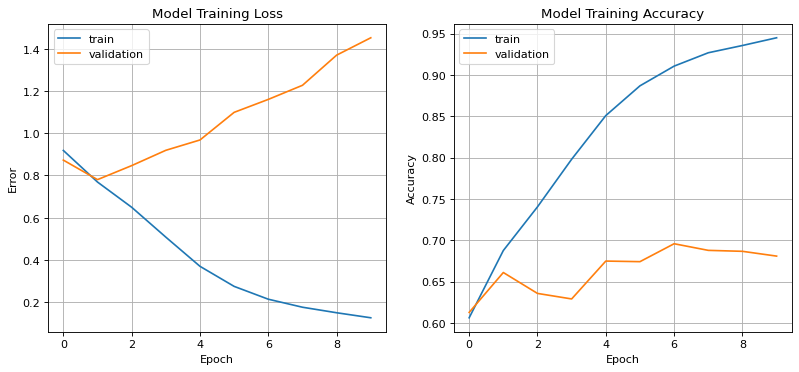

In [41]:
# Define a function to plot the loss curve
def plotLoss(h, name):
    plt.plot(h.history['loss'], label='train')
    plt.plot(h.history['val_loss'], label='validation')
    plt.title('{0} Training Loss'.format(name))
    plt.xlabel('Epoch')
    plt.ylabel('Error')
    plt.legend()
    plt.grid(True)

# Plot the Accuracy curve
def plotAccuracy(h, name):
    plt.plot(h.history['Accuracy'], label='train')
    plt.plot(h.history['val_Accuracy'], label='validation')
    plt.title('{0} Training Accuracy'.format(name))
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)

# Define the sub-plot size
nCols = 2
nRows = 1

# Prepare the Loss Plots
plt.figure(figsize=(nCols * 6, nRows * 5), dpi=80)

# Plot the Loss
plt.subplot(nRows, nCols, 1)
plotLoss(history, 'Model')

# Plot the Accuracy
plt.subplot(nRows, nCols, 2)
plotAccuracy(history, 'Model')

# Draw the plots
plt.show()



### Load in the Test Data

In [42]:
# Load in the dataframe
df = pd.read_csv('input\\drugsComTest_raw.csv')

# Display the dataframe
display(df)

# Display the dataframe description
print("Description of the dataframe:")
display(df.describe().T)

,uniqueID,drugName,condition,review,rating,date,usefulCount
0,163740,Mirtazapine,Depression,"""I&#039;ve tried a few antidepressants over th...",10,28-Feb-12,22
1,206473,Mesalamine,"Crohn's Disease, Maintenance","""My son has Crohn&#039;s disease and has done ...",8,17-May-09,17
2,159672,Bactrim,Urinary Tract Infection,"""Quick reduction of symptoms""",9,29-Sep-17,3
3,39293,Contrave,Weight Loss,"""Contrave combines drugs that were used for al...",9,5-Mar-17,35
4,97768,Cyclafem 1 / 35,Birth Control,"""I have been on this birth control for one cyc...",9,22-Oct-15,4
...,...,...,...,...,...,...,...
53761,159999,Tamoxifen,"Breast Cancer, Prevention","""I have taken Tamoxifen for 5 years. Side effe...",10,13-Sep-14,43
53762,140714,Escitalopram,Anxiety,"""I&#039;ve been taking Lexapro (escitaploprgra...",9,8-Oct-16,11
53763,130945,Levonorgestrel,Birth Control,"""I&#039;m married, 34 years old and I have no ...",8,15-Nov-10,7
53764,47656,Tapentadol,Pain,"""I was prescribed Nucynta for severe neck/shou...",1,28-Nov-11,20


Description of the dataframe:


,count,mean,std,min,25%,50%,75%,max
uniqueID,53766.0,116386.701187,67017.739881,0.0,58272.5,116248.5,174586.75,232284.0
rating,53766.0,6.976900,3.285207,1.0,4.0,8.0,10.00,10.0
usefulCount,53766.0,27.989752,36.172833,0.0,6.0,16.0,36.00,949.0


### Preprocess the Testing Set

In [43]:
# Prepare the dataset
df = prepare_data(df)

# Split the Testing Data
X_test = list(df['review'])
y_test = list(df['rating'])

# Preprocess the reviews and labels
X_test = prepare_reviews_arr(X_test)
y_test = prepare_labels_arr(y_test)

### Evaluate the Model

In [44]:
# Evaluate the Model
loss, accuracy, recall = model.evaluate(X_test, y_test, verbose=1)

1509/1509 [==============================] - 11s 7ms/step - loss: 0.7336 - Accuracy: 0.8329 - recall: 0.8151


### Classification Report

In [45]:
# Evaluate the model
y_pred = model.predict(X_test)

# Prepare the arrays
y_pred = np.argmax(y_pred, axis=1)
y_test = np.argmax(y_test, axis=1)

# Print the Classification Report
target_names = ['negative', 'neutral', 'positive']
print('Classification Report:\n', classification_report(y_test, y_pred, target_names=target_names, zero_division=1))

1509/1509 [==============================] - 11s 7ms/step
Classification Report:
               precision    recall  f1-score   support

    negative       0.77      0.80      0.78     12097
     neutral       0.52      0.63      0.57      4335
    positive       0.91      0.87      0.89     31848

    accuracy                           0.83     48280
   macro avg       0.73      0.77      0.75     48280
weighted avg       0.84      0.83      0.84     48280



### Confusion Matrix

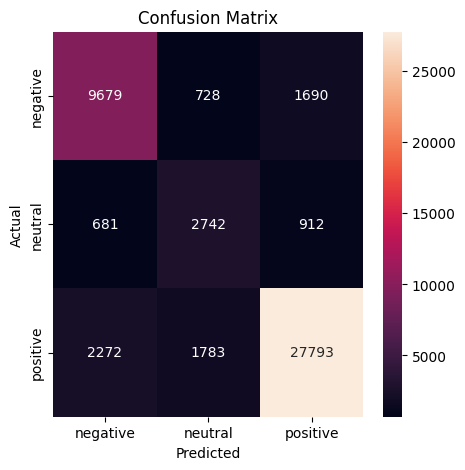

In [46]:
# Plot the Confusion Matrix
matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 5))
sns.heatmap(matrix, annot=True, fmt='d', xticklabels=target_names, yticklabels=target_names)
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

## 8. Discussion and conclusions

Instructions: Write

- What settings and models were tested before the best model was found
    - What where the results of these experiments 
- Summary of  
    - What was your best model and its settings 
    - What was the final achieved performance 
- What are your main observations and learning points
- Discussion how the model could be improved in future 

**Note:** Remember to evaluate the final metrics using the test set. 
